**TO DO LIST**
- group by movies and see the proportions of men and women in movies per year --> do an average proportion by year (plot for the whole duration but can also see per year if a movie contributes more or less)
- merge with the personnas 

In [1]:
# This script will start the cleanup of the Movie data

import seaborn as sns
import math
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
data_folder = './Data/'


In [2]:
movies_metadata = pd.read_csv(data_folder+'movie.metadata.tsv', header=None, sep='\t', names=['wikipedia_ID','freebase_ID','name','release_date', 'box_office_revenue', 'runtime', 'languages', 'countries', 'genre'], parse_dates=False)
movies_metadata.head(5)

,wikipedia_ID,freebase_ID,name,release_date,box_office_revenue,runtime,languages,countries,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [3]:
character_metadata = pd.read_csv(data_folder+'character.metadata.tsv', header=None, sep='\t', names=['wikipedia_ID','freebase_ID','release_date', 'character_name', 'actor_birthday', 'actor_gender', 'actor_height', 'actor_ethnicity', 'actor_name' , 'actor_age','freebase_character_actor_mapID', 'freebase_character_ID', 'freebase_actor_ID' ], parse_dates=False)
character_metadata.head(5)

,wikipedia_ID,freebase_ID,release_date,character_name,actor_birthday,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_character_actor_mapID,freebase_character_ID,freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [4]:
plot_summaries = pd.read_csv(data_folder+'plot_summaries.txt',sep='\t', header=None, names=['wikipedia_ID', 'plot_summary'] )
plot_summaries.head()

,wikipedia_ID,plot_summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


**How many movies do we have?**

In [5]:
number_of_data= movies_metadata.count()
number_of_data

wikipedia_ID          81741
freebase_ID           81741
name                  81741
release_date          74839
box_office_revenue     8401
runtime               61291
languages             81741
countries             81741
genre                 81741
dtype: int64

**Where is data mostly missing ?**

In [6]:
proportion_of_each_data = number_of_data/number_of_data['wikipedia_ID']*100
proportion_of_each_data

wikipedia_ID          100.000000
freebase_ID           100.000000
name                  100.000000
release_date           91.556257
box_office_revenue     10.277584
runtime                74.981955
languages             100.000000
countries             100.000000
genre                 100.000000
dtype: float64

We see that the box office column is a column with a lot of missing data, it is only present for 10% of movies.

Given we will perform our analysis on American movies we will only keep the data for movies from the US

In [7]:
us_movies_metadata = movies_metadata[movies_metadata['countries'].str.contains('United States of America', case=False)].copy()
us_movies_metadata

,wikipedia_ID,freebase_ID,name,release_date,box_office_revenue,runtime,languages,countries,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
10,175026,/m/017n1p,Sarah and Son,1930,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama"", ""/m/01g6gs"": ""Black-an..."
...,...,...,...,...,...,...,...,...,...
81725,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana..."
81726,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
81727,24209227,/m/07k5mlk,"The Time, the Place and the Girl",1946,NaN,105.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/05p553"": ""Comedy film"", ""/m/02l7c8"": ""Rom..."
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"


In [8]:
us_movies_metadata['languages'] = us_movies_metadata['languages'].apply(lambda x: list(ast.literal_eval(x).values()))
us_movies_metadata

,wikipedia_ID,freebase_ID,name,release_date,box_office_revenue,runtime,languages,countries,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],"{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"[Silent film, English Language]","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,[English Language],"{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
10,175026,/m/017n1p,Sarah and Son,1930,NaN,86.0,[English Language],"{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama"", ""/m/01g6gs"": ""Black-an..."
...,...,...,...,...,...,...,...,...,...
81725,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"[Italian Language, English Language]","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana..."
81726,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,[],"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
81727,24209227,/m/07k5mlk,"The Time, the Place and the Girl",1946,NaN,105.0,[English Language],"{""/m/09c7w0"": ""United States of America""}","{""/m/05p553"": ""Comedy film"", ""/m/02l7c8"": ""Rom..."
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English Language],"{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"


How many movies did we keep?

In [9]:
print(us_movies_metadata.count())

wikipedia_ID          34408
freebase_ID           34408
name                  34408
release_date          33197
box_office_revenue     6936
runtime               29509
languages             34408
countries             34408
genre                 34408
dtype: int64


In [10]:
print('Total Number of movies', number_of_data.wikipedia_ID)
print('Number of non-US movies', number_of_data.wikipedia_ID - us_movies_metadata.wikipedia_ID.count())
print('Meaning we will be working with',us_movies_metadata.wikipedia_ID.count(), 'movies for our analysis')

Total Number of movies 81741
Number of non-US movies 47333
Meaning we will be working with 34408 movies for our analysis


In [11]:
#Let's remove the dictionaries from the countries and the genre of our data

us_movies_metadata['countries'] = us_movies_metadata['countries'].apply(lambda x: list(ast.literal_eval(x).values()))
us_movies_metadata['genre'] = us_movies_metadata['genre'].apply(lambda x: list(ast.literal_eval(x).values()))

us_movies_metadata

,wikipedia_ID,freebase_ID,name,release_date,box_office_revenue,runtime,languages,countries,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"[Silent film, English Language]",[United States of America],"[Short Film, Silent film, Indie, Black-and-whi..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]"
10,175026,/m/017n1p,Sarah and Son,1930,NaN,86.0,[English Language],[United States of America],"[Drama, Black-and-white]"
...,...,...,...,...,...,...,...,...,...
81725,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"[Italian Language, English Language]","[France, United States of America]","[Parody, Americana, Comedy]"
81726,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,[],[United States of America],"[Thriller, Erotic thriller, Psychological thri..."
81727,24209227,/m/07k5mlk,"The Time, the Place and the Girl",1946,NaN,105.0,[English Language],[United States of America],"[Comedy film, Romance Film, Musical]"
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English Language],[United States of America],[Drama]


Let's see what languages we still have in our data

In [12]:
us_movies_metadata["languages"].explode().unique()

array(['English Language', 'Silent film', nan, 'Spanish Language',
       'Greek Language', 'Swahili Language', 'French Language',
       'Standard Mandarin', 'Standard Cantonese', 'Italian Language',
       'Japanese Language', 'American English', 'German Language',
       'Arabic Language', 'Czech Language', 'Slovak Language',
       'Thai Language', 'Portuguese Language', 'Polish Language',
       'Tibetan languages', 'Mandarin Chinese', 'Cantonese',
       'Standard Tibetan', 'Chinese language', 'Swedish Language',
       'Hungarian language', 'Russian Language', 'Dutch Language',
       'Persian Language', 'Irish', 'American Sign Language',
       'Tagalog language', 'Filipino language', 'Xhosa Language',
       'Afrikaans Language', 'Urdu Language', 'Hebrew Language',
       'Tamil Language', 'Latin Language', 'Turkish Language',
       'Hindi Language', 'Serbo-Croatian', 'Croatian language',
       'Serbian language', 'Kannada Language', 'Punjabi language',
       'Bengali Langu

Of interest for us are: English Language, Silent Film, American English, Old English Language (for example Indian English is not very relevant for our analysis, as well as native american languages like Navajo or Hawaiian language). Question for the group, do we keep American Sign Language movies? So let us remove any movie that doesn't have English Language, Silent Film, American English or Old English Language as one of their language

In [13]:
us_english_movies_metadata = us_movies_metadata[movies_metadata['languages'].str.contains('English Language' or 'Silent Film' or 'American English' or 'Old English Language', case=False)].copy()
us_english_movies_metadata

/var/folders/71/3q_x6c_90j90w5lmxycvpzgr0000gn/T/ipykernel_26827/3760038286.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  us_english_movies_metadata = us_movies_metadata[movies_metadata['languages'].str.contains('English Language' or 'Silent Film' or 'American English' or 'Old English Language', case=False)].copy()


,wikipedia_ID,freebase_ID,name,release_date,box_office_revenue,runtime,languages,countries,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"[Silent film, English Language]",[United States of America],"[Short Film, Silent film, Indie, Black-and-whi..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]"
10,175026,/m/017n1p,Sarah and Son,1930,NaN,86.0,[English Language],[United States of America],"[Drama, Black-and-white]"
...,...,...,...,...,...,...,...,...,...
81721,34474142,/m/0cpy07r,Frontier Fury,1943-06-24,NaN,55.0,[English Language],[United States of America],[Western]
81725,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"[Italian Language, English Language]","[France, United States of America]","[Parody, Americana, Comedy]"
81727,24209227,/m/07k5mlk,"The Time, the Place and the Girl",1946,NaN,105.0,[English Language],[United States of America],"[Comedy film, Romance Film, Musical]"
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English Language],[United States of America],[Drama]


Did we remove any movies by doing that?

In [14]:
print('We had',us_movies_metadata.wikipedia_ID.count(), 'movies in our U.S data frame')
print('We now have', us_english_movies_metadata.wikipedia_ID.count(), 'in our English US data frame')
print('So there are',us_movies_metadata.wikipedia_ID.count()-us_english_movies_metadata.wikipedia_ID.count(), 'movies that were from the US but not in any of the languages we decided to consider' )

We had 34408 movies in our U.S data frame
We now have 30528 in our English US data frame
So there are 3880 movies that were from the US but not in any of the languages we decided to consider


**Small alternative:** keep movies that have NaN as languages to complement it potentially later:

In [15]:
# of course this can be modified if we decide to keep more languages
languages_to_keep = ['English Language', 'Silent Film','American English','Old English Language']

us_english_movie_with_nan_metadata = us_movies_metadata[us_movies_metadata['languages'].apply(lambda x: any(lang in x for lang in languages_to_keep) or len(x) == 0)]
us_english_movie_with_nan_metadata

,wikipedia_ID,freebase_ID,name,release_date,box_office_revenue,runtime,languages,countries,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"[Silent film, English Language]",[United States of America],"[Short Film, Silent film, Indie, Black-and-whi..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]"
10,175026,/m/017n1p,Sarah and Son,1930,NaN,86.0,[English Language],[United States of America],"[Drama, Black-and-white]"
...,...,...,...,...,...,...,...,...,...
81725,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"[Italian Language, English Language]","[France, United States of America]","[Parody, Americana, Comedy]"
81726,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,[],[United States of America],"[Thriller, Erotic thriller, Psychological thri..."
81727,24209227,/m/07k5mlk,"The Time, the Place and the Girl",1946,NaN,105.0,[English Language],[United States of America],"[Comedy film, Romance Film, Musical]"
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[English Language],[United States of America],[Drama]


In [16]:
print('While we kept', us_english_movies_metadata.wikipedia_ID.count(), 'movies in our dataframe by removing movies that had no language provided, we keep',us_english_movie_with_nan_metadata.wikipedia_ID.count(), 'by keeping those movies. Thereby, only removing', us_movies_metadata.wikipedia_ID.count() - us_english_movie_with_nan_metadata.wikipedia_ID.count(), 'movies.' )

While we kept 30528 movies in our dataframe by removing movies that had no language provided, we keep 34076 by keeping those movies. Thereby, only removing 332 movies.


**Now let us have a look at the genres we have in our dataset**

In [17]:
us_movies_metadata["genre"].explode().unique()

array(['Thriller', 'Science Fiction', 'Horror', 'Adventure',
       'Supernatural', 'Action', 'Space western', 'Mystery',
       'Biographical film', 'Drama', 'Crime Drama', 'Short Film',
       'Silent film', 'Indie', 'Black-and-white', 'Comedy', 'Musical',
       'Romantic comedy', 'Ensemble Film', 'Comedy-drama',
       'Romantic drama', 'Romance Film', 'Animation', 'Fantasy',
       'Family Film', "Children's/Family", "Children's Fantasy",
       'Future noir', 'Erotic thriller', 'Film adaptation',
       'Crime Fiction', 'Coming of age', 'Psychological thriller',
       'Suspense', 'Crime Thriller', 'Black comedy', 'Marriage Drama',
       'Western', 'Parody', 'Mockumentary', 'Fan film', 'War film',
       'Epic', 'Biopic [feature]', 'Historical Epic', 'Sports',
       'Family Drama', 'Action/Adventure', 'Costume drama',
       'Historical fiction', 'Culture & Society', 'Biography',
       'Documentary', 'Christmas movie', 'Television movie',
       'Action Comedy', 'Cult', 'Blaxp

As we can see we have a massive amount (342) of genres, so at some point we will need to filter or chose certain genres to analyze.

**Plot of the number of movies per year**

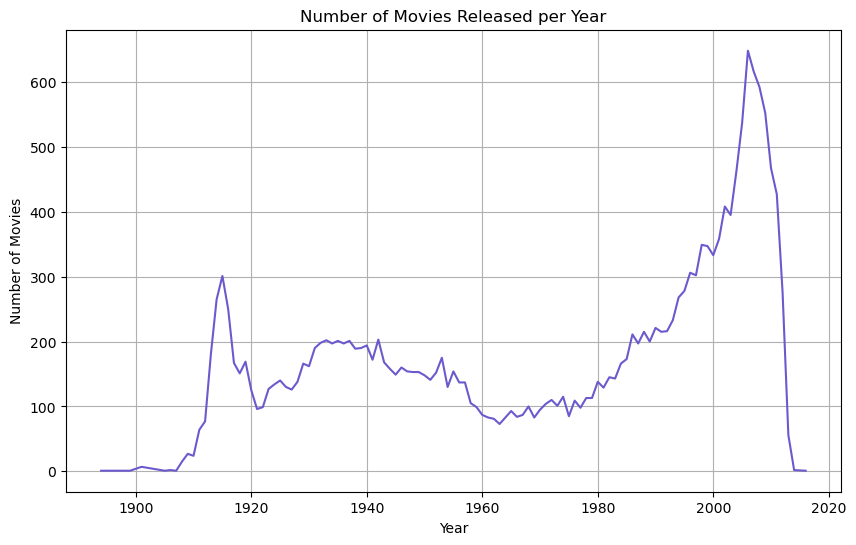

In [18]:
# Let us first exclude movies that have an unknown release date (this is only for the sake of this plot, we will complement later if needed)
movies = us_english_movie_with_nan_metadata.dropna(subset=['release_date']).copy()
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

# Group movies by release year
movies_grouped_by_year = movies.groupby(movies['release_date'].dt.year)

#number of movies per year
number_movies_per_year = movies_grouped_by_year.size()

plt.figure(figsize=(10, 6))
number_movies_per_year.plot(kind='line', color = 'slateblue')
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

**end Anabel**

**beginning Victoria**

**Exploration and first filtering of the data**

Let's start by checking the completeness of the character dataset:

In [19]:
number_of_data_character= character_metadata.count()
number_of_data_character

wikipedia_ID                      450669
freebase_ID                       450669
release_date                      440674
character_name                    192794
actor_birthday                    344524
actor_gender                      405060
actor_height                      154824
actor_ethnicity                   106058
actor_name                        449441
actor_age                         292556
freebase_character_actor_mapID    450669
freebase_character_ID             192804
freebase_actor_ID                 449854
dtype: int64

In [20]:
proportion_of_each_data_character = number_of_data_character/number_of_data_character['wikipedia_ID']*100
proportion_of_each_data_character

wikipedia_ID                      100.000000
freebase_ID                       100.000000
release_date                       97.782186
character_name                     42.779512
actor_birthday                     76.447237
actor_gender                       89.879712
actor_height                       34.354260
actor_ethnicity                    23.533458
actor_name                         99.727516
actor_age                          64.915936
freebase_character_actor_mapID    100.000000
freebase_character_ID              42.781731
freebase_actor_ID                  99.819158
dtype: float64

The data seems pretty complete regarding the release date of the movies, actor's gender and actor's age. Nevertheless, we need  to complete the dataset with more character's name to be able to analyze deeper the personnas associated with them and use this result in our analysis. getting also more data on actors' ethnicity would also be of choice as this will allow us to extend our analysis to other minorities such as people of color. 

Let's filter the character metadata to remove actors with a gender differing from F or M. However, let's first explore the values that "gender" take.

In [21]:
# Check values in the "actor_gender" column
character_metadata.loc[character_metadata.actor_gender.isna(), "actor_gender"] = "NA"
display(character_metadata.groupby("actor_gender").count().actor_name)

actor_gender
F     134800
M     270248
NA     44393
Name: actor_name, dtype: int64

As expected, actor's gender is either F (female), M (male) or NA (not mentionned). Nevertheless, this check was necessary in order to make sure no one identified as non-binary for example. Let's now remove the actors with NA as gender as well as all the characters in movies that have no release date as our analysis is related to time.

In [23]:
# remove any value that is not "F" or "M" in the "gender" column or the character metadata, keeps the rest
character_metadata_noNA_gender = character_metadata[character_metadata["actor_gender"].isin(["F", "M"])].copy()
# drop the characters in movies with no release date
character_metadata_noNA_genderYear = character_metadata_noNA_gender.dropna(subset=['release_date']).copy()

display(character_metadata_noNA_genderYear)
print('From the original character dataset, we dropped ', character_metadata.shape[0]-character_metadata_noNA_genderYear.shape[0], 'characters either because the movie had no release date or the gender of the actor was not specified, out of ', character_metadata.shape[0], 'characters initially.')

,wikipedia_ID,freebase_ID,release_date,character_name,actor_birthday,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_character_actor_mapID,freebase_character_ID,freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450662,913762,/m/03pcrp,1992-05-21,Silvie Gena,1958,F,NaN,NaN,Susan Byrkett,34.0,/m/0kr40b9,/m/0kr40bf,/m/0gn4nd
450663,913762,/m/03pcrp,1992-05-21,Exegran,NaN,M,NaN,NaN,Hal Cleaveland,NaN,/m/0kr407c,/m/0kr406_,/m/0kr407h
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j


From the original character dataset, we dropped  55455 characters either because the movie had no release date or the gender of the actor was not specified, out of  450669 characters initially.


**What's the proportion of female actors in movies per year?**
We wonder if the proportion of female actors' increase over the years, which is what we would expect.

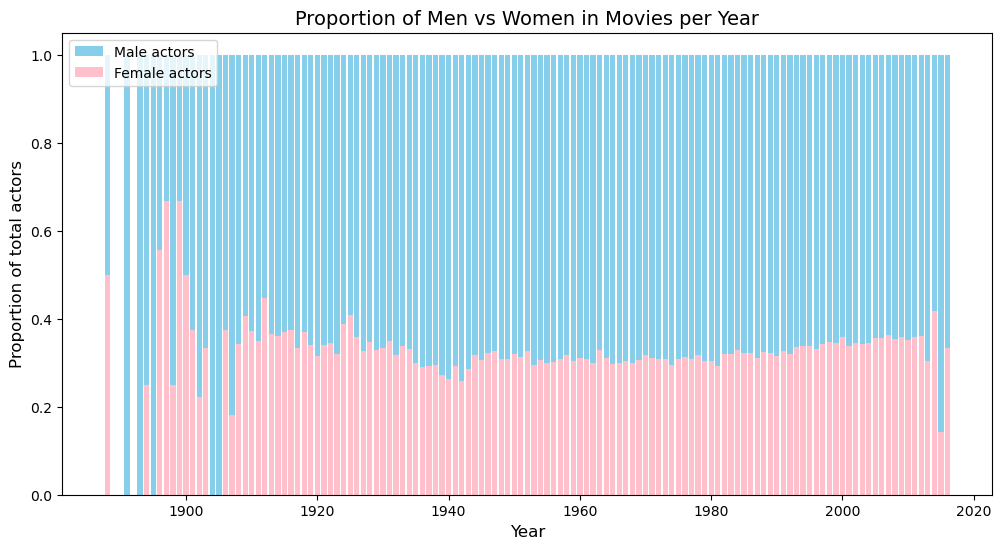

In [43]:
# convert the release_date to a date format (YYYY/MM/DD but any date that initially only has a year will be converted to YYYY/01/01)
character_metadata_noNA_genderYear['release_date'] = character_metadata_noNA_genderYear['release_date'].astype(str)
character_metadata_noNA_genderYear['release_date'] = pd.to_datetime(character_metadata_noNA_genderYear['release_date'], format = 'mixed', errors='coerce')

# group the movies by year
characters_grouped_by_year = character_metadata_noNA_genderYear.groupby(character_metadata_noNA_genderYear['release_date'].dt.year)

# Calculate the proportion of men and women per year
proportion_female = characters_grouped_by_year['actor_gender'].apply(lambda x: (x == 'F').sum() / len(x))
proportion_male = 1 - proportion_female

# Plotting the proportion of men vs women per year as a stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(proportion_male.index, proportion_male.values, bottom=proportion_female.values, label='Male actors', color='skyblue')
plt.bar(proportion_female.index, proportion_female.values, label='Female actors', color='pink')
plt.title('Proportion of Men vs Women in Movies per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Proportion of total actors', fontsize=12)
plt.legend()
plt.show()

Interestingly, the proportion of women over the decades stayed fairly constant, close to 40%. This constrasts with what we expected as we would think that women representation would get better over the years.  **Questions for the group: should we remove data from before 1910 as so low that doesn't make sense?**

Nevertheless, this result doesn't mean that each movie has approximately 40% of women in their cast. This result might be biased by movies that have an extremelly low/high proportion of women versus movies that have a balanced actors cast. To determine if that is the case, let's plot the proportion of movies per year that have 0-25% women, 25-50%, 50-75% or 75-100% women. Are female actors represented equally in every movies or is there a discrepentie between movies released in the same year?

In [63]:
# number of movies per year
number_movies_per_year_character = characters_grouped_by_year.size()

# group by year and by movie
characters_grouped_by_year_and_movie = character_metadata_noNA_genderYear.groupby([character_metadata_noNA_genderYear['release_date'].dt.year, 'wikipedia_ID'])

# Calculate the proportion of men and women per year per movie
proportion_female_per_movie = characters_grouped_by_year_and_movie['actor_gender'].apply(lambda x: (x == 'F').sum() / len(x))
proportion_male_per_movie = 1 - proportion_female_per_movie

# Convert the Series to a DataFrame for easier data handling in later analysis
female_proportions = proportion_female_per_movie.reset_index()

# Rename the columns if needed
female_proportions.columns = ['release_date', 'wikipedia_ID', 'proportion_female']

# Display the new DataFrame
display(female_proportions)

,release_date,wikipedia_ID,proportion_female
0,1888.0,1082508,0.500000
1,1891.0,644824,0.000000
2,1893.0,73372,0.000000
3,1894.0,786716,0.000000
4,1894.0,1090697,0.000000
...,...,...,...
59962,2014.0,36724342,0.285714
59963,2015.0,2312141,0.000000
59964,2015.0,25813358,0.666667
59965,2015.0,32416903,0.000000


In [64]:
#Lists to store in which category each movie belongs to per year
below_25_per_year = []
quarter_50_per_year = []
half_75_per_year = []
above_75_per_year = []

# Iterate through each year in the index of female_proportions
for year, proportions in female_proportions.groupby('release_date'):
    
    # Count movies in different categories for the current year
    below_25 = len(proportions[proportions['proportion_female'] <= 0.25])
    quarter_50 = len(proportions[(proportions['proportion_female'] > 0.25) & (proportions['proportion_female'] <= 0.5)])
    half_75 = len(proportions[(proportions['proportion_female'] > 0.5) & (proportions['proportion_female'] <= 0.75)])
    above_75 = len(proportions[proportions['proportion_female'] > 0.75])
    
    # Calculate proportions for each category
    total_movies = len(proportions)
    proportion_below_25 = below_25 / total_movies
    proportion_quarter_50 = quarter_50 / total_movies
    proportion_half_75 = half_75 / total_movies
    proportion_above_75 = above_75 / total_movies
    
    # Append proportions to respective lists
    below_25_per_year.append(proportion_below_25)
    quarter_50_per_year.append(proportion_quarter_50)
    half_75_per_year.append(proportion_half_75)
    above_75_per_year.append(proportion_above_75)


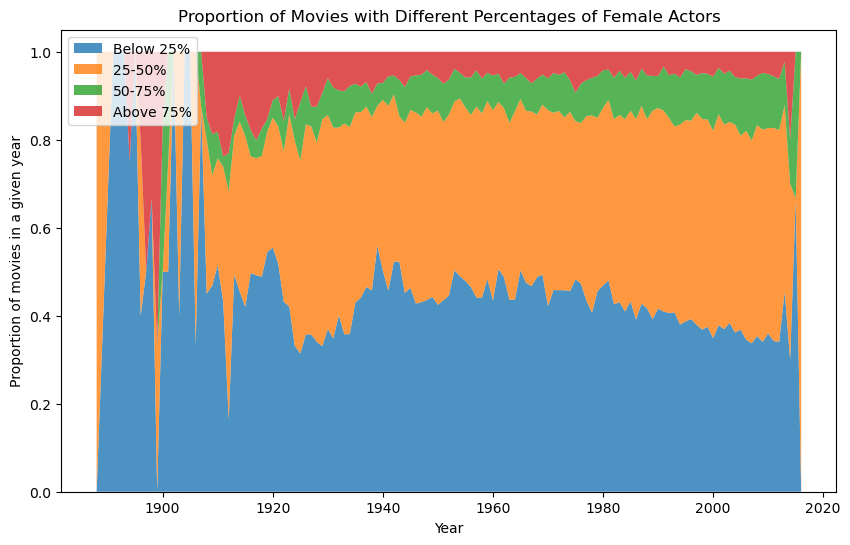

In [66]:
# Extract unique years from the 'release_date' column of the female_proportions DataFrame
unique_years = female_proportions['release_date'].unique()

# Convert the unique years to a list
years = list(unique_years)

# Data for stack plot
categories = ['Below 25%', '25-50%', '50-75%', 'Above 75%']
data = [below_25_per_year, quarter_50_per_year, half_75_per_year, above_75_per_year]

# Create a stack plot
plt.figure(figsize=(10, 6))
plt.stackplot(years, data, labels=categories, alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Proportion of movies in a given year')
plt.title('Proportion of Movies with Different Percentages of Female Actors')
plt.legend(loc='upper left')
plt.show()

We can observe that a vast majority of movies have less than 50% of women in their cast. Actually, over the years, a vast majority of movies (approximately 80%) have less than 50% female actors in their cast. Thus, even though overall the proportion of women seems to be close to 40% over the years, their are largely underrepresented in the vast majority of movies.
**remove data from before 1910 and after 2010 maybe, same comment as before**

**What's the age difference of female actors in movies compared to male actors over the years? Are female actors significantly younger than male actors?**

In [67]:
# drop the actors with NaN as age but also actors with negative ages (which appeared in 1910)
character_age = character_metadata_noNA_genderYear.dropna(subset=['actor_age']).copy()                              
character_age = character_age[character_age['actor_age'] >= 0] # remove actors with a negative age
display(character_age)

,wikipedia_ID,freebase_ID,release_date,character_name,actor_birthday,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_character_actor_mapID,freebase_character_ID,freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450660,913762,/m/03pcrp,1992-05-21,Additional Voices,1954,M,NaN,NaN,Sonny Byrkett,38.0,/m/0kr405f,/m/0kr405k,/m/0gn4bz
450661,913762,/m/03pcrp,1992-05-21,UN Spacy Commander,1954,M,NaN,NaN,Sonny Byrkett,38.0,/m/0kr407w,/m/0kr407_,/m/0gn4bz
450662,913762,/m/03pcrp,1992-05-21,Silvie Gena,1958,F,NaN,NaN,Susan Byrkett,34.0,/m/0kr40b9,/m/0kr40bf,/m/0gn4nd
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j


**QUESTION: instead of dropping the negative ages, should I take their absolute value? i.e. is it just a typo?**

In [71]:
# Group by year and gender
characters_age_by_year_gender = character_age.groupby([character_age['release_date'].dt.year, 'actor_gender'])

# Calculate average age and standard deviation of age for each gender per year
gender_age_stats_per_year = characters_age_by_year_gender['actor_age'].agg(['mean', 'sem'])

# Reset the index to make the grouped columns accessible for further analysis or visualization
gender_age_stats_per_year.reset_index(inplace=True)

# check the results
print("Average Age and Standard Deviation of Age for Each Gender Per Year:")
display(gender_age_stats_per_year)

Average Age and Standard Deviation of Age for Each Gender Per Year:


,release_date,actor_gender,mean,sem
0,1908,F,5.000000,3.000000
1,1909,F,3.600000,0.509902
2,1910,F,9.000000,NaN
3,1911,F,9.000000,0.000000
4,1912,F,7.875000,1.007782
...,...,...,...,...
208,2014,M,41.400000,3.532108
209,2015,F,50.500000,14.500000
210,2015,M,50.272727,5.319075
211,2016,F,42.000000,4.000000


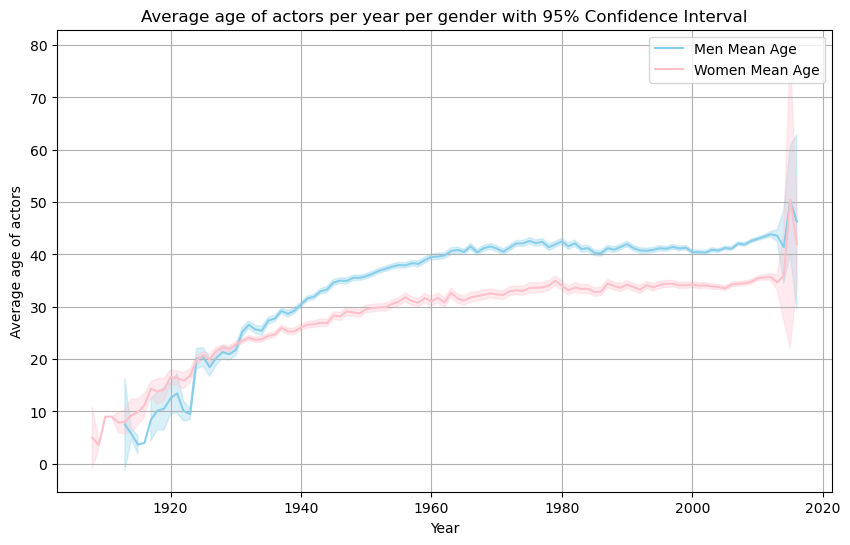

In [72]:
# Filter data for men and women separately for easier handling
men_data = gender_age_stats_per_year[gender_age_stats_per_year['actor_gender'] == 'M'].copy()
women_data = gender_age_stats_per_year[gender_age_stats_per_year['actor_gender'] == 'F'].copy()

# Calculate 95% confidence interval for men
men_data['lower_bound'] = men_data['mean'] - 1.96 * men_data['sem']
men_data['upper_bound'] = men_data['mean'] + 1.96 * men_data['sem']

# Calculate 95% confidence interval for women
women_data['lower_bound'] = women_data['mean'] - 1.96 * women_data['sem']
women_data['upper_bound'] = women_data['mean'] + 1.96 * women_data['sem']

# Plotting for men
plt.figure(figsize=(10, 6))
plt.plot(men_data['release_date'], men_data['mean'], label='Men Mean Age', color='skyblue')
plt.fill_between(men_data['release_date'], men_data['lower_bound'], men_data['upper_bound'], alpha=0.3, color='skyblue')

# Plotting for women
plt.plot(women_data['release_date'], women_data['mean'], label='Women Mean Age', color='pink')
plt.fill_between(women_data['release_date'], women_data['lower_bound'], women_data['upper_bound'], alpha=0.3, color='pink')
plt.xlabel('Year')
plt.ylabel('Average age of actors')
plt.title('Average age of actors per year per gender with 95% Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()

Throughout the years, female actors are significantly younger than men at the 5% significance level.

**TO DO: MERGE WITH THE PERSONNAS TO ANALYSE**
regarder les roles opposés (dumb blonde vs genius) et voir si plus représenté dans un genre + enlever les genre ou ça fait pas sens de comparer genre (e.g. films de guerre, documentaires... car ce sont des évènements historique donc on peut rien y faire))

**What personnas are associated with movie characters interpreted by male and female actors? Are female characters (so female actors) mostly associated woth beauty, stupidity, weakness and sexualized and men mostly associated with heroism, adventure, strenght...?**

In [73]:
# load the dataset
personnas_metadata = pd.read_csv(data_folder+'tvtropes.clusters.txt', names=['personnas','data'],header=None, sep='\t')
display(personnas_metadata)

,personnas,data
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."
...,...,...
496,young_gun,"{""char"": ""Morgan Earp"", ""movie"": ""Tombstone"", ..."
497,young_gun,"{""char"": ""Colorado Ryan"", ""movie"": ""Rio Bravo""..."
498,young_gun,"{""char"": ""Tom Sawyer"", ""movie"": ""The League of..."
499,young_gun,"{""char"": ""William H. 'Billy the Kid' Bonney"", ..."


In [78]:
print('There are', len(personnas_metadata["personnas"].explode().unique()), 'unique personnas for', personnas_metadata.shape[0], 'characters.')

There are 72 unique personnas for 501 characters.


Let's format the personnas dataset better to have one feature per column.

In [75]:
#import JSON because the second column of the dataset is of type JSON
import json

# Read the data from the text file, comma is the delimiter
personnas_metadata = pd.read_csv(data_folder + 'tvtropes.clusters.txt', names=['personnas', 'data'], header=None, sep='\t')

# Replace single quotes with a placeholder character, to avoid error in parsing
personnas_metadata['data'] = personnas_metadata['data'].str.replace("'", "@@QUOTE@@")
personnas_metadata['data'] = personnas_metadata['data'].apply(lambda x: x.replace("@@QUOTE@@", "'"))

# Function to load JSON strings
def json_loads(x):
    try:
        return json.loads(x)
    except (ValueError, SyntaxError):
        print(f"Error decoding JSON: {x}")
        return None

# Parse the JSON-like strings and split them into separate columns
personnas_metadata['data'] = personnas_metadata['data'].apply(json_loads)
personnas_metadata = pd.concat([personnas_metadata.drop('data', axis=1), personnas_metadata['data'].apply(pd.Series)], axis=1)

#Rename the id column so it matches  with the character dataset to be able to merge (information from the README file) --> maps the actor with its character in the character metadata dataset
personnas_metadata.rename(columns={'id': 'freebase_character_actor_mapID'}, inplace=True) 

display(personnas_metadata)

,personnas,char,movie,freebase_character_actor_mapID,actor
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader
...,...,...,...,...,...
496,young_gun,Morgan Earp,Tombstone,/m/0k776f,Bill Paxton
497,young_gun,Colorado Ryan,Rio Bravo,/m/0k2kqg,Ricky Nelson
498,young_gun,Tom Sawyer,The League of Extraordinary Gentlemen,/m/0k5nsh,Shane West
499,young_gun,William H. 'Billy the Kid' Bonney,Young Guns II,/m/03lrjk0,Emilio Estevez


Let's merge this data with the character data we have on freebase_character_actor_mapID as this relates the personnas with the actor and the character they play in a specific movie.
**do not drop that column as I need it for the merge!!!**

In [84]:
personnas_metadata = personnas_metadata.merge(character_metadata_noNA_genderYear, on=["freebase_character_actor_mapID"], how="left")
display(personnas_metadata)

,personnas,char,movie,freebase_character_actor_mapID,actor,wikipedia_ID,freebase_ID,release_date,character_name,actor_birthday,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_character_ID,freebase_actor_ID
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams,1344253.0,/m/04vcfx,1997-11-26,Professor Philip Brainard,1951-07-21,M,1.702,NaN,Robin Williams,46.0,/m/0cls20k,/m/0dzf_
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane,1486573.0,/m/0557n3,1994-12-21,Professor Keenbean,1955-06-25,M,NaN,NaN,Michael McShane,39.0,/m/0h6dygh,/m/05tkfc
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen,5991505.0,/m/0fjjjh,1994-07-01,Dr. Reinhardt Lane,1939-05-25,M,1.800,NaN,Ian McKellen,55.0,/m/0gynqd6,/m/03ym1
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn,605676.0,/m/02vt5c,1954-06-16,Dr. Harold Medford,1877-09-26,M,NaN,NaN,Edmund Gwenn,NaN,/m/0h5whpq,/m/03bpcj
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader,28327.0,/m/070g7,1994-10-28,Daniel Jackson,1960-02-07,M,1.780,NaN,James Spader,34.0,/m/02qs1z,/m/043js
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,young_gun,Morgan Earp,Tombstone,/m/0k776f,Bill Paxton,525113.0,/m/02ljhg,1993-12-25,Morgan Earp,1955-05-17,M,1.800,NaN,Bill Paxton,38.0,/m/0h2kg3k,/m/01s7zw
497,young_gun,Colorado Ryan,Rio Bravo,/m/0k2kqg,Ricky Nelson,81100.0,/m/0kyjk,1959-03-18,Colorado Ryan,1940-05-08,M,1.820,/m/065b6q,Ricky Nelson,18.0,/m/0hgx0j0,/m/01wj92r
498,young_gun,Tom Sawyer,The League of Extraordinary Gentlemen,/m/0k5nsh,Shane West,4138142.0,/m/0bl3nn,2003-07-11,Tom Sawyer,1978-06-10,M,1.820,/m/0fqz6,Shane West,25.0,/m/0c1sd26,/m/054v2v
499,young_gun,William H. 'Billy the Kid' Bonney,Young Guns II,/m/03lrjk0,Emilio Estevez,675213.0,/m/031zk3,1990-08-01,William H. 'Billy the Kid' Bonney,1962-05-12,M,1.638,/m/042gtr,Emilio Estevez,28.0,/m/0gyhwpk,/m/01z7s_


In [94]:
# only add the column personnas to the characters dataset
character_metadata_noNA_genderYear_personnas = character_metadata_noNA_genderYear.merge(personnas_metadata[['freebase_character_actor_mapID', 'personnas']],on=["freebase_character_actor_mapID"],how="left").copy()

display(character_metadata_noNA_genderYear_personnas)

,wikipedia_ID,freebase_ID,release_date,character_name,actor_birthday,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_character_actor_mapID,freebase_character_ID,freebase_actor_ID,personnas
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,NaN
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,NaN
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,NaN
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,NaN
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395263,913762,/m/03pcrp,1992-05-21,Silvie Gena,1958,F,NaN,NaN,Susan Byrkett,34.0,/m/0kr40b9,/m/0kr40bf,/m/0gn4nd,NaN
395264,913762,/m/03pcrp,1992-05-21,Exegran,NaN,M,NaN,NaN,Hal Cleaveland,NaN,/m/0kr407c,/m/0kr406_,/m/0kr407h,NaN
395265,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv,NaN
395266,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j,NaN


### note for the group: character_metadata_noNA_genderYear_personnas in the filtered (no NA gender and no NA release data) character dataset supplemented with personnas for 500 characters

We added to our filtered character dataset the personnas to the corresponding characters.

In [96]:
# For the following analysis, drop all the characters that don't have personnas
character_metadata_noNA_genderYear_personnas_noNA = character_metadata_noNA_genderYear_personnas.dropna(subset=['personnas']).copy()  
display(character_metadata_noNA_genderYear_personnas_noNA)

,wikipedia_ID,freebase_ID,release_date,character_name,actor_birthday,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_character_actor_mapID,freebase_character_ID,freebase_actor_ID,personnas
517,196176,/m/01bwgr,1971-11-03,David Sumner,1937-08-08,M,1.66,/m/041rx,Dustin Hoffman,34.0,/m/0k3v65,/m/0ch916z,/m/0bl2g,tranquil_fury
2729,1157158,/m/04c13q,2002-03-29,Sheldon Mopes,1969-08-18,M,1.83,NaN,Edward Norton,32.0,/m/0jx3b8,/m/0gy99_8,/m/01515w,granola_person
3474,504242,/m/02j9_2,2005-08-22,Mr. Universe,1978-05-15,M,1.68,/m/041rx,David Krumholtz,27.0,/m/0k31lb,/m/02sgjdt,/m/05cx7x,playful_hacker
4060,6917005,/m/0gwypk,2003-02-16,Harold Hill,1962-03-21,M,1.73,/m/041rx,Matthew Broderick,40.0,/m/04hv61w,/m/09j606t,/m/01vlj1g,charmer
4061,6917005,/m/0gwypk,2003-02-16,Harold Hill,1962-03-21,M,1.73,/m/041rx,Matthew Broderick,40.0,/m/04hv61w,/m/09j606t,/m/01vlj1g,loveable_rogue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388839,101954,/m/0pv3x,1996-11-06,Geoffrey Clifton,1960-09-10,M,1.87,/m/0d7wh,Colin Firth,36.0,/m/0k4_tz,/m/0c0fwm8,/m/03f1zdw,crazy_jealous_guy
389134,9513043,/m/02ph9tm,2008-06-06,Zohan,1966-09-09,M,1.78,/m/041rx,Adam Sandler,41.0,/m/03hqx35,/m/0cb03np,/m/0pz91,warrior_poet
392879,52549,/m/0dtfn,1977-05-25,Han Solo,1942-07-13,M,1.85,/m/01qhm_,Harrison Ford,34.0,/m/0k3r1_,/m/0fjn8,/m/0c0k1,charmer
392880,52549,/m/0dtfn,1977-05-25,Han Solo,1942-07-13,M,1.85,/m/01qhm_,Harrison Ford,34.0,/m/0k3r1_,/m/0fjn8,/m/0c0k1,loveable_rogue


From the size of the datasets, we can see that one personnas has been dropped because there were no matches between the freebase_character_actor_mapID in the characters data.

In [98]:
# Check values in the "actor_gender" column to make sure it is populated
character_metadata_noNA_genderYear_personnas_noNA.loc[character_metadata_noNA_genderYear_personnas_noNA.actor_gender.isna(), "actor_gender"] = "NA"
display(character_metadata_noNA_genderYear_personnas_noNA.groupby("actor_gender").count().actor_name)

actor_gender
F     69
M    431
Name: actor_name, dtype: int64

From this very simple line, we can already see that out of the 500 characters, only 69 are played by women, which is already a poor representation. 

In [105]:
# split the dataframe in 2: one for males and one for women, which is easier for the subsequent analysis
male_personnas_data = character_metadata_noNA_genderYear_personnas_noNA[character_metadata_noNA_genderYear_personnas_noNA['actor_gender'] == 'M'].copy()
female_personnas_data = character_metadata_noNA_genderYear_personnas_noNA[character_metadata_noNA_genderYear_personnas_noNA['actor_gender'] == 'F'].copy()

In [100]:
# print the female personnas with their number of occurance
unique_female_personnas_counts = female_personnas_data["personnas"].explode().value_counts()
# Sort the unique_personnas_counts Series by the count in descending order
sorted_female_personnas_counts = unique_female_personnas_counts.sort_values(ascending=False)
sorted_female_personnas_counts

personnas
dumb_blonde                 10
brainless_beauty             7
chanteuse                    6
final_girl                   6
valley_girl                  6
prima_donna                  6
ophelia                      5
broken_bird                  4
granola_person               4
slacker                      2
eccentric_mentor             2
junkie_prophet               2
storyteller                  1
adventurer_archaeologist     1
doormat                      1
klutz                        1
heartbroken_badass           1
arrogant_kungfu_guy          1
ditz                         1
classy_cat_burglar           1
bully                        1
Name: count, dtype: int64

In [101]:
# Do the same for men
unique_male_personnas_counts = male_personnas_data["personnas"].explode().value_counts()
# Sort the unique_personnas_counts Series by the count in descending order
sorted_male_personnas_counts = unique_male_personnas_counts.sort_values(ascending=False)
print(sorted_male_personnas_counts.head(20))

personnas
crazy_jealous_guy              25
corrupt_corporate_executive    23
byronic_hero                   17
psycho_for_hire                16
father_to_his_men              15
stoner                         13
master_swordsman               12
hitman_with_a_heart            10
bounty_hunter                  10
warrior_poet                    9
loveable_rogue                  9
surfer_dude                     9
jerk_jock                       9
slacker                         9
arrogant_kungfu_guy             8
cultured_badass                 8
hardboiled_detective            8
tranquil_fury                   7
big_man_on_campus               7
casanova                        7
Name: count, dtype: int64


In [107]:
# Extract the index (unique 'personnas') from both DataFrames
female_personnas = sorted_female_personnas_counts.index
male_personnas = sorted_male_personnas_counts.index

# Find the intersection between the two sets of 'personnas'
common_personnas = set(female_personnas) & set(male_personnas)

# Create a list of with the common personnas and their count in the male and female data
common_personnas_data = [
    {
        'personna': personna,
        'female_count': sorted_female_personnas_counts.get(personna, 0),
        'male_count': sorted_male_personnas_counts.get(personna, 0),
        'association_with_F_compared_to_M' : (sorted_female_personnas_counts.get(personna, 0)/len(female_personnas_data)) / (sorted_male_personnas_counts.get(personna, 0)/len(male_personnas_data))
    }
    for personna in common_personnas
]

# Create a DataFrame from the list of dictionaries
common_personnas_df = pd.DataFrame(common_personnas_data)
display(common_personnas_df)

,personna,female_count,male_count,association_with_F_compared_to_M
0,slacker,2,9,1.388084
1,heartbroken_badass,1,6,1.041063
2,granola_person,4,4,6.246377
3,broken_bird,4,1,24.985507
4,eccentric_mentor,2,3,4.164251
5,dumb_blonde,10,1,62.463768
6,arrogant_kungfu_guy,1,8,0.780797
7,ditz,1,6,1.041063
8,adventurer_archaeologist,1,3,2.082126
9,doormat,1,3,2.082126


This dataframe shows which personnas are common for male and female as well as the count of each gender. The last colomn normalizes the counts to be able to compare them between females and males (as there are 69 females vs 431 males). It is sticking how "dumb_blond" is more than 64 times more for associated with women than men. Overall, terms with a bad connotation (broken_bird, dumb_blonde, brainless_beauty or bully) are much more associated to women than men. However, it is important to remember that the analysis is made only on 500 characters. 